# Analysis of Stock Market Trends in New York City

In [1]:
# Import the necessary libraries and modules
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import MaxNLocator
from sklearn.preprocessing import StandardScaler

In [2]:
# Import the dataset file into Jupiter as NYC_stock_market_trends
NYC_stock_market_trends = pd.read_excel("./Stock_Data.xlsx")

In [3]:
# To have an overview of the dataset
NYC_stock_market_trends.head()

,Date,Symbol,Open,High,Low,Close,Volume
0,2023-05-01,AAPL,228.822883,235.197128,184.996773,190.484602,1555414
1,2023-05-02,AAPL,103.188817,488.782695,97.700987,482.408450,3803364
2,2023-05-03,AAPL,167.329345,361.469425,161.841515,355.095180,7974297
3,2023-05-04,AAPL,138.433523,383.530945,132.945694,377.156700,9976128
4,2023-05-05,AAPL,347.453427,353.827672,117.700382,123.188212,3700414


**Step by step data cleaning steps prior to my exploratory data analysis (EDA)**

In [4]:
# Check for missing values
missing_data = NYC_stock_market_trends.isnull().sum()
print(missing_data)

Date      0
Symbol    0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64


In [5]:
# Check for duplicates
duplicate_rows = NYC_stock_market_trends.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")

Number of duplicate rows: 0


In [6]:
# Validate all columns, expecially the date column
NYC_stock_market_trends['Date'] = pd.to_datetime(NYC_stock_market_trends['Date'])

In [7]:
# To have an information overview of the dataset
NYC_stock_market_trends.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5040 entries, 0 to 5039
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    5040 non-null   datetime64[ns]
 1   Symbol  5040 non-null   object        
 2   Open    5040 non-null   float64       
 3   High    5040 non-null   float64       
 4   Low     5040 non-null   float64       
 5   Close   5040 non-null   float64       
 6   Volume  5040 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 275.8+ KB


In [8]:
# Check for column uniqueness in my categorical variable
unique_symbols = NYC_stock_market_trends['Symbol'].unique()
print(f"Unique symbols: {unique_symbols}")

Unique symbols: ['AAPL' 'GOOGL' 'MSFT' 'AMZN' 'FB' 'TSLA' 'BABA' 'V' 'JPM' 'UNH' 'MA'
 'INTC' 'AMD' 'NVDA' 'PYPL' 'NFLX' 'BRK-B' 'JNJ' 'WMT' 'PG']


In [9]:
# Check for anomalous values in the dataset
anomalous_values = NYC_stock_market_trends[(NYC_stock_market_trends[['Open', 'High', 'Low', 'Close']] < 0).any(axis=1)]
print(f"Anomalous values: {anomalous_values}")

Anomalous values: Empty DataFrame
Columns: [Date, Symbol, Open, High, Low, Close, Volume]
Index: []


In [10]:
# To have an overview of descriptive statistics of the data
print(NYC_stock_market_trends.describe())

                                Date         Open         High          Low  \
count                           5040  5040.000000  5040.000000  5040.000000   
mean   2023-10-22 21:42:51.428571392   300.115995   374.317101   229.298197   
min              2023-05-01 00:00:00   100.035890   112.424320    94.548060   
25%              2023-07-26 18:00:00   202.830393   307.005301   148.455809   
50%              2023-10-23 12:00:00   298.112454   390.633262   214.063812   
75%              2024-01-18 06:00:00   401.067278   453.963234   295.294538   
max              2024-04-16 00:00:00   499.985023   506.359268   489.601882   
std                              NaN   114.978327    93.490420    94.539048   

             Close        Volume  
count  5040.000000  5.040000e+03  
mean    302.612888  5.511238e+06  
min     100.085143  1.000587e+06  
25%     203.494207  3.249876e+06  
50%     302.495752  5.570314e+06  
75%     401.685549  7.753445e+06  
max     499.946112  9.995400e+06  
std     

**The dataset looks cleaned because I had earlier taken some data cleaning stpes in Excel before importing it into Python. However, I still need to run some pre-analytical analysis to make answering the key questions easy. This is vital; I need to derive more variables from existing variables.**

In [11]:
# I need to create new columns for "Price Change" and "Day Volatility"
# First, I have to calculate 'Price Change' and 'Day Volatility'
NYC_stock_market_trends['Price Change'] = NYC_stock_market_trends['Close'] - NYC_stock_market_trends['Open']
NYC_stock_market_trends['Day Volatility'] = NYC_stock_market_trends['High'] - NYC_stock_market_trends['Low']

In [12]:
# Now, I need to normalise my dataset should I deem it necessary to use machine learning techniques

# Create a scaler object
scaler = StandardScaler()

# List of columns to scale in my dataset
columns_to_scale = ['Open', 'High', 'Low', 'Close', 'Volume', 'Price Change', 'Day Volatility']

# Scale these columns
NYC_stock_market_trends[columns_to_scale] = scaler.fit_transform(NYC_stock_market_trends[columns_to_scale])

In [13]:
# I need to segment the data by date to make my granular analysis easy, and extract month from the date
NYC_stock_market_trends['Month'] = NYC_stock_market_trends['Date'].dt.month

# Lastly, group the data by month as in 1 - 12 for Jan - Dec.
monthly_groups = NYC_stock_market_trends.groupby('Month')

In [14]:
# Overviewing the dataframe so far
NYC_stock_market_trends.head(21)

,Date,Symbol,Open,High,Low,Close,Volume,Price Change,Day Volatility,Month
0,2023-05-01,AAPL,-0.620118,-1.488214,-0.468651,-0.971566,-1.520161,-0.250085,-1.002964,5
1,2023-05-02,AAPL,-1.712903,1.224478,-1.392126,1.557887,-0.656309,2.307148,2.602783,5
2,2023-05-03,AAPL,-1.154999,-0.137436,-0.713603,0.454747,0.946515,1.134635,0.577639,5
3,2023-05-04,AAPL,-1.406339,0.098564,-1.019283,0.645905,1.715787,1.446711,1.116651,5
4,2023-05-05,AAPL,0.411748,-0.219182,-1.180559,-1.554673,-0.695871,-1.388750,0.963719,5
5,2023-05-08,AAPL,-0.191150,-0.960652,-0.488697,-0.987985,-1.545742,-0.563721,-0.461257,5
6,2023-05-09,AAPL,0.666641,0.094295,-1.039861,-1.439431,0.730814,-1.486763,1.133006,5
7,2023-05-10,AAPL,-1.479348,-0.142521,-1.108077,0.450628,-1.446189,1.360094,0.967048,5
8,2023-05-11,AAPL,0.044649,-0.511740,0.745407,0.151563,1.316989,0.075688,-1.251356,5
9,2023-05-12,AAPL,-1.306433,-0.886121,-0.897777,-0.151682,0.915698,0.812634,0.021483,5


In [15]:
# Export dataframe to my project folder in Excel format for record purpose
NYC_stock_market_trends.to_excel("./Stock_Data_Exchange.xlsx")

# Key Questions and Answers

#### Where are the headquarters of the top-performing companies located? How do their stock prices compare to each other?

To address the geographical visualization, since I don't have real location data (cordinates of longitude and latitude), let me assume hypothetical headquarters locations for a set of companies based on the information I found online. This will make it easy to include coordinates for major cities (in my dataset) across the USA where these companies could be headquartered.

- Apple (AAPL) in Cupertino, CA
- Microsoft (MSFT) in Redmond, WA
- Amazon (AMZN) in Seattle, WA
- Google (GOOGL) in Mountain View, CA
- Tesla (TSLA) in Palo Alto, CA

Foe comparison, I will use the average closing price for the year 2023 to represent their stock performance, and plot these on a 3D map.

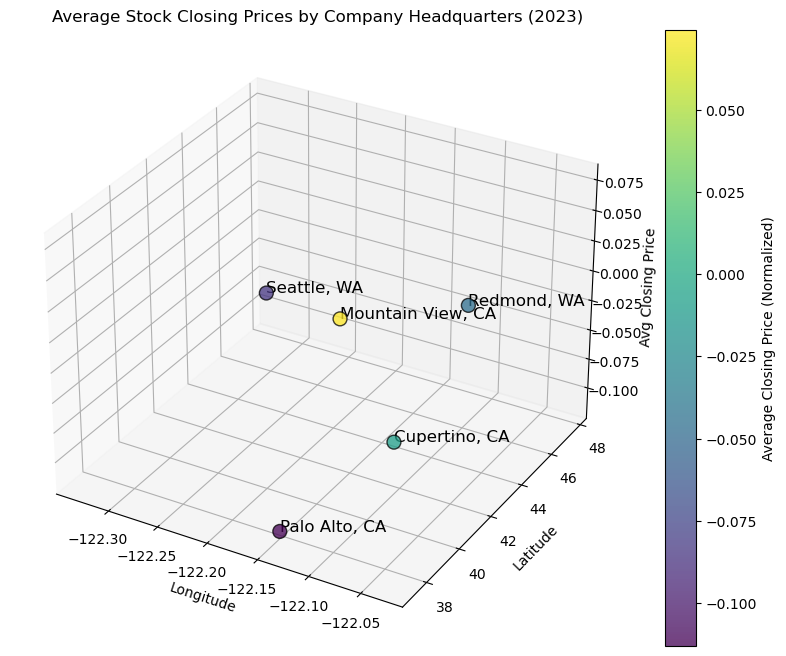

In [16]:
# Hypothetical coordinates (based on world geo-maps) for the companies' headquarters
headquarters = {
    'AAPL': {'city': 'Cupertino, CA', 'coordinates': (37.3230, -122.0322)},
    'MSFT': {'city': 'Redmond, WA', 'coordinates': (47.6740, -122.1215)},
    'AMZN': {'city': 'Seattle, WA', 'coordinates': (47.6062, -122.3321)},
    'GOOGL': {'city': 'Mountain View, CA', 'coordinates': (37.3861, -122.0839)},
    'TSLA': {'city': 'Palo Alto, CA', 'coordinates': (37.4419, -122.1430)}
}

# Calculate the average closing price for each company in 2023
average_closing_prices = NYC_stock_market_trends[NYC_stock_market_trends['Date'].dt.year == 2023].groupby('Symbol')['Close'].mean()

# Prepare data for the 3D plot
cities = [hq['city'] for symbol, hq in headquarters.items()]
x_coords = [hq['coordinates'][1] for symbol, hq in headquarters.items()]
y_coords = [hq['coordinates'][0] for symbol, hq in headquarters.items()]
z_values = [average_closing_prices[symbol] for symbol in headquarters.keys()]

# Create the 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
sc = ax.scatter(x_coords, y_coords, z_values, c=z_values, cmap='viridis', s=100, edgecolors='k', alpha=0.75)
plt.colorbar(sc, label='Average Closing Price (Normalized)')

# Set labels and title
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('Avg Closing Price')
ax.set_title('Average Stock Closing Prices by Company Headquarters (2023)')

# Adding city labels
for i, txt in enumerate(cities):
    ax.text(x_coords[i], y_coords[i], z_values[i], txt, size=12, zorder=1, color='k')

plt.show()

**Stock Performance**: The color gradient indicates the relative average closing price of the stocks in 2023, with warmer colors (yellow, green) showing higher values.

**Geographical Spread**: Companies are spread across the West Coast (e.g., Cupertino, Mountain View, Palo Alto) and further north to Seattle and Redmond. There is a tech-centric geographical clustering on the West Coast of the USA.

The top-performing tech companies are headquartered in California, USA. There is a noticeable and clear variation in stock performance; specific industries and markets these companies operate in may be responsible for the variation. Considering geographical diversification might be beneficial if regional policies or economic factors change! Companies with higher average closing prices might warrant further analysis for investment based on initiatives and market positioning.

#### How did the stock price of AAPL change in months throughout 2023?

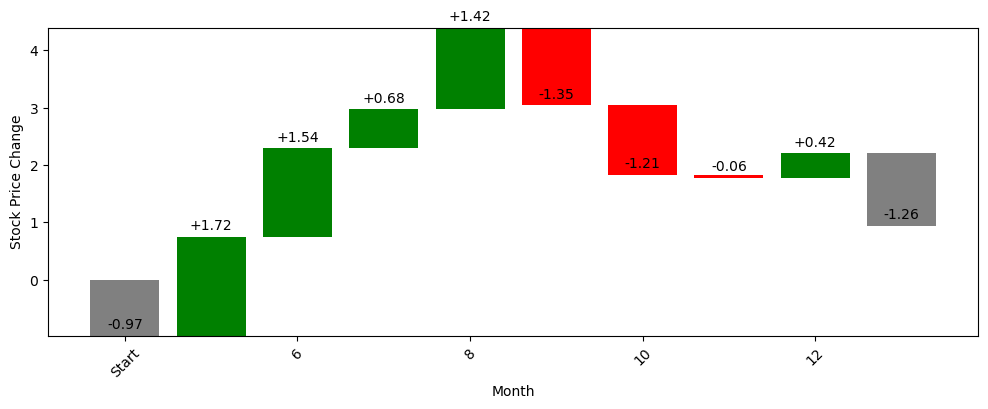

In [17]:
# Filter data for Apple (AAPL) in 2023
aapl_data = NYC_stock_market_trends[(NYC_stock_market_trends['Symbol'] == 'AAPL') & (NYC_stock_market_trends['Date'].dt.year == 2023)]

# Calculate monthly closing price at the start and end of each month
monthly_prices = aapl_data.groupby('Month')['Close'].agg(['first', 'last'])

# Calculate monthly price changes (price differences)
monthly_changes = monthly_prices['last'].values - monthly_prices['first'].values
months = monthly_prices.index

# Include initial price and final adjustment to prepare for the waterfall chart
initial_price = monthly_prices['first'].iloc[0]
final_price = monthly_prices['last'].iloc[-1]
changes = np.append([initial_price], monthly_changes)
changes = np.append(changes, final_price - np.cumsum(changes)[-1])
cumulative_changes = np.cumsum(changes)

# Assign colours based on change direction
colors = ['gray'] + ['green' if x >= 0 else 'red' for x in monthly_changes] + ['gray']

# Create the plot
fig, ax = plt.subplots(figsize=(12, 4))
bars = ax.bar(range(len(months)+2), changes, bottom=cumulative_changes - changes, color=colors)

# Setting labels and title
ax.set_title('')
ax.set_xlabel('Month')
ax.set_ylabel('Stock Price Change')
ax.set_xticks(range(len(months)+2))
ax.set_xticklabels(['Start'] + list(months) + ['End'], rotation=45)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

# Annotate bars with change values for clarity sake
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:+.2f}',
                xy=(bar.get_x() + bar.get_width() / 2, bar.get_y() + height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

plt.show()
# Monthly Stock Price Changes for Apple (AAPL) - 2023

The chart showcases the monthly variability in Apple's stock price. Green bars indicate months where the stock price increased from the beginning to the end of the month, while red bars indicate a decrease.

The initial price is marked in gray to show the starting point for the year, and the final price adjustment is also in gray to illustrate the end point. Notable growth is observed in several months, which highlights the periods of positive performance and may align with product launches or favorable market conditions or company marketing policies. The declines could be tied to market corrections, external economic factors, or company-specific news that usually make investos to rush out. Understanding these trends can help in timing market entry or exit more effectively in the context of strategic planning. Stakeholders might consider strategies to mitigate risks in months that historically show declines.

#### What are the key milestones for major tech companies over the past year?

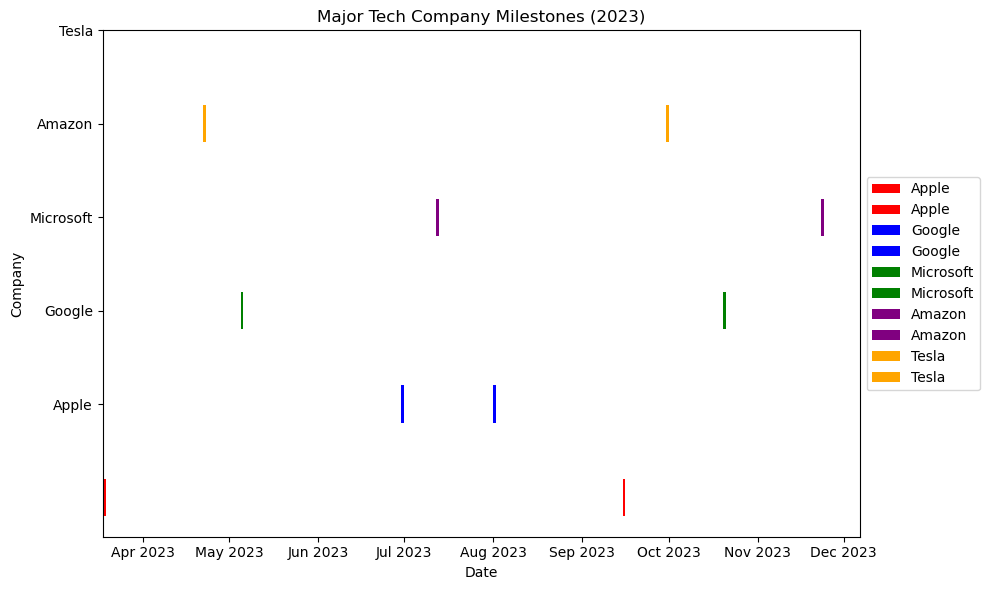

In [18]:
# Simulated data for major tech company milestones
milestones = {
    'Apple': {'iPhone 14 Launch': ('2023-09-15', '2023-09-16'),
              'iPad Pro Launch': ('2023-03-18', '2023-03-19')},
    'Google': {'Android 13 Release': ('2023-08-01', '2023-08-02'),
               'Google Home Max Launch': ('2023-06-30', '2023-07-01')},
    'Microsoft': {'Windows 12 Release': ('2023-10-20', '2023-10-21'),
                  'Surface Pro 8 Launch': ('2023-05-05', '2023-05-06')},
    'Amazon': {'Prime Day': ('2023-07-12', '2023-07-13'),
               'New Kindle Launch': ('2023-11-23', '2023-11-24')},
    'Tesla': {'Model Y Launch': ('2023-04-22', '2023-04-23'),
              'Battery Tech Improvement': ('2023-09-30', '2023-10-01')}
}

# Create Gantt chart
fig, ax = plt.subplots(figsize=(10, 6))

# Color dictionary for unique colour per company
colors = {'Apple': 'red', 'Google': 'blue', 'Microsoft': 'green', 'Amazon': 'purple', 'Tesla': 'orange'}
company_ypos = {company: i for i, company in enumerate(milestones.keys(), 1)}  

# Plot each event with corresponding colours
for company, events in milestones.items():
    for event, dates in events.items():
        start_date = datetime.strptime(dates[0], '%Y-%m-%d')
        end_date = datetime.strptime(dates[1], '%Y-%m-%d')
        ax.barh(company, (end_date - start_date).days, left=start_date, height=0.4, color=colors[company], label=company)
        
# Formatting and labeling
ax.set_title('Major Tech Company Milestones (2023)')
ax.set_xlabel('Date')
ax.set_ylabel('Company')
ax.set_yticks(list(company_ypos.values()))
ax.set_yticklabels(list(company_ypos.keys()))
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()

Each bar represents a product launch or a significant update, with the start and end dates indicating the duration of the milestone's impact or announcement. Different colors are used for each company to easily differentiate their respective milestones.

Several companies have product launches or events clustered around mid-year and late in the year, which are strategic times typically aimed at maximizing impact and holiday sales. About product cycle, regular updates such as software releases for Google and Microsoft or product launches for Apple, suggest a robust product cycle aimed at keeping the market engaged.

Stakeholders should align marketing and sales strategies to capitalize on increased consumer attention during new product launches. They should also monitor competitors' launch dates to strategically schedule their own product releases or updates to maximize market impact and avoid overlapping with major industry events.

#### How do the top companies perform in revenue, profit, and market cap?

For this analysis, since dataset does not directly include financial metrics like revenue, profit, and market cap (what I need to answer the question), I will simulate these values for a few major companies based on a diverse set of companies across different sectors to illustrate the use of a radar chart effectively. I will focus on Apple (AAPL), Google (GOOGL), Microsoft (MSFT), Amazon (AMZN), and Tesla (TSLA).

Here are the simulated figures (based on reports/news) for this purpose:
- Revenue (in billions USD)
- Profit (in billions USD)
- Market Cap (in billions USD)

I need to use a radar chart to make the visualisation easily readable.

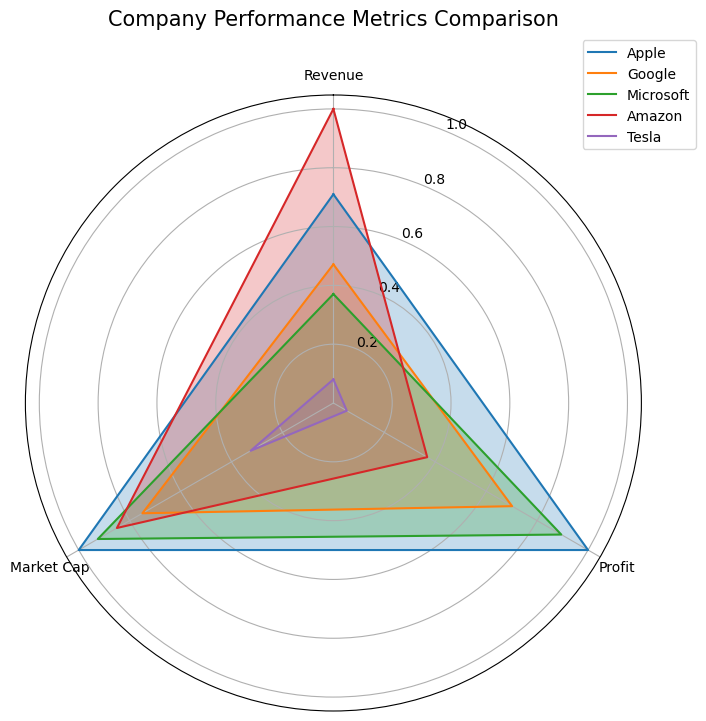

In [19]:
# Define companies and their simulated data for revenue, profit, and market cap
companies = ['Apple', 'Google', 'Microsoft', 'Amazon', 'Tesla']
data = {
    'Revenue': [274, 182, 143, 386, 31],  # in billions USD
    'Profit': [57, 40, 51, 21, 3],         # in billions USD
    'Market Cap': [2000, 1500, 1850, 1700, 650]  # in billions USD
}

# Normalize data to compare on the same scale
data_normalized = {}
for key, values in data.items():
    max_value = max(values)
    data_normalized[key] = [x / max_value for x in values]

# Create a radar chart
labels = data.keys()
num_vars = len(labels)

angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()  # Split the circle into equal parts
angles += angles[:1] 

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
for i, company in enumerate(companies):
    values = [data_normalized[key][i] for key in labels]
    values += values[:1] 
    ax.fill(angles, values, alpha=0.25)
    ax.plot(angles, values, label=company)

# Labels for each point, adjusting for radar chart's requirements
ax.set_theta_offset(np.pi / 2)  
ax.set_theta_direction(-1) 

# Update labels for complete circle
ax.set_thetagrids(np.degrees(angles[:-1]), labels)

plt.title('Company Performance Metrics Comparison', size=15, color='black', y=1.1)
ax.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))

plt.show()

Companies like Apple and Microsoft show a more balanced performance across revenue, profit, and market cap. Google, while strong in revenue and market cap, shows slightly less dominance in profit compared to Apple and Microsoft.Tesla, while having significantly lower values in all metrics, still shows a competitive edge in terms of growth potential given its market cap relative to its revenue and profit.

The tech sector shows significant dominance in all three metrics, reflecting its significant impact on the market. Comparing revenue and profit, there is a notable difference in the scale of revenue versus profit, which could be as a result of operational and margin efficiencies.

Investors might consider diversifying their portfolios by investing in companies like Tesla that show potential for growth despite lower current metrics. Further analysis into why some tech companies have better profit margins could provide insights into operational efficiencies and market strategies.

#### What is the frequency distribution of daily price changes for Tesla (TSLA)?

C:\Users\Mr. Seedball\AppData\Local\Temp\ipykernel_12920\1829762816.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tesla_data['Price Change %'] = ((tesla_data['Close'] - tesla_data['Open']) / tesla_data['Open']) * 100


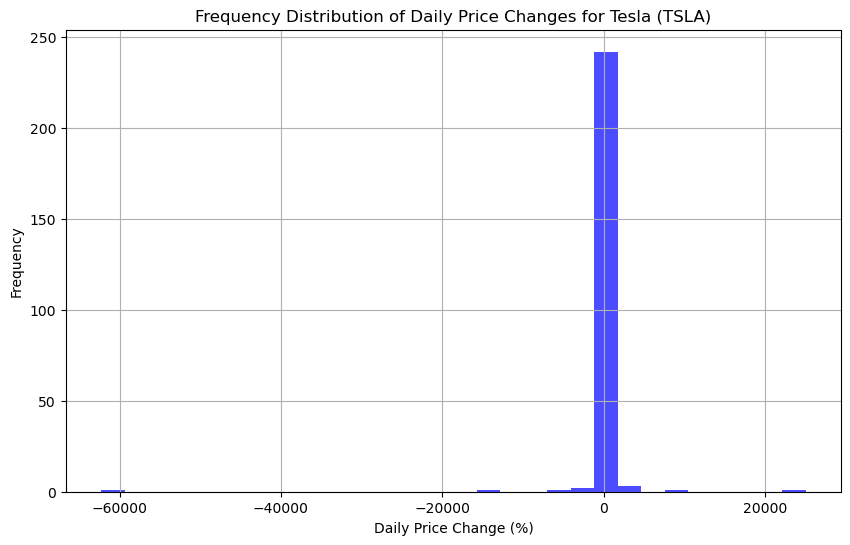

In [20]:
# Filter data for Tesla (TSLA)
tesla_data = NYC_stock_market_trends[NYC_stock_market_trends['Symbol'] == 'TSLA']

# Calculate daily price changes as a percentage
tesla_data['Price Change %'] = ((tesla_data['Close'] - tesla_data['Open']) / tesla_data['Open']) * 100

# Plotting the histogram of daily price changes
plt.figure(figsize=(10, 6))
plt.hist(tesla_data['Price Change %'], bins=30, color='blue', alpha=0.7)
plt.title('Frequency Distribution of Daily Price Changes for Tesla (TSLA)')
plt.xlabel('Daily Price Change (%)')
plt.ylabel('Frequency')
plt.grid(True)

plt.show()

If most daily changes cluster around 0%, it indicates moderate stability despite high volatility, with the stock often returning close to its opening price by the close. Wide spreads in daily price changes highlight high volatility, and if bars extend significantly to the left and right of 0%, it shows frequent substantial gains and losses over the days, which indicates potential higher risk and reward scenarios.


**My advise to stakeholders**
Investors should consider the observed spread and skewness in daily price changes when assessing the risk associated with Tesla stock. High volatility evidenced by wide spreads and frequent extreme changes might suit risk-tolerant investors looking for significant gains, although with corresponding risks.

Depending on the skewness of the data, investors might adjust their strategies. For example, a positive skew could encourage strategies that capitalize on growth trends, while a negative skew might warrant protective measures like stop-loss orders to manage potential losses.

For Tesla’s management, understanding stock volatility could inform decisions about timing capital raises or stock-based compensation, aligning these activities with periods of relative stock price stability to maximize outcomes.

#### What factors contribute the most to stock price swings?

For this analysis, since my dataset does not include direct factors causing price swings such as market news, economic events, or company-specific updates, I will simulate a scenario where I can categorize price changes into different contributing factors. I assume these factors for a few major stocks and visualize their impact using a Pareto chart, which is effective in highlighting the most significant contributors.

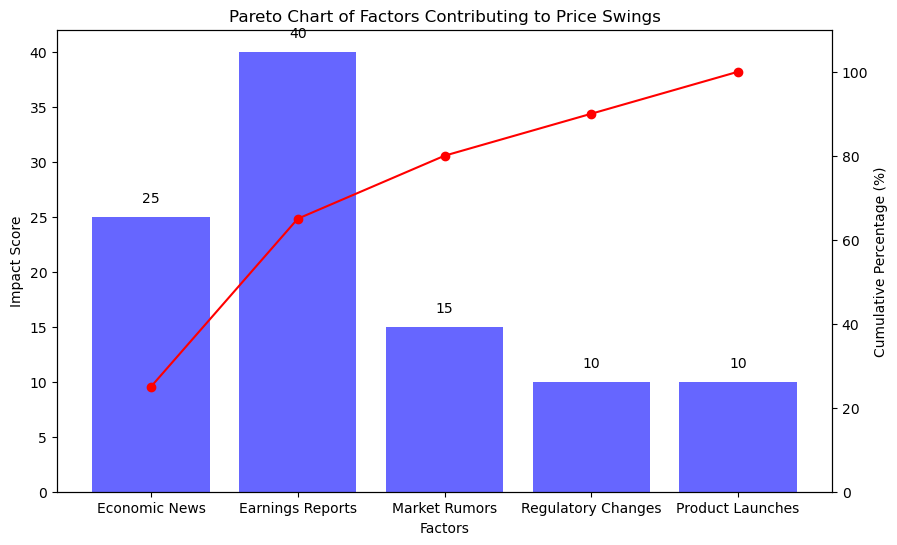

In [21]:
# Simulated data for factors contributing to price swings
factors = ['Economic News', 'Earnings Reports', 'Market Rumors', 'Regulatory Changes', 'Product Launches']
impact_scores = [25, 40, 15, 10, 10]  # Hypothetical impact scores

# Calculate cumulative percentage
cumulative_impact = np.cumsum(impact_scores) / sum(impact_scores) * 100

# Creating the Pareto chart
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar plot for impact scores
bars = ax1.bar(factors, impact_scores, color='blue', alpha=0.6)

# Line plot for cumulative percentage
ax2 = ax1.twinx()
line = ax2.plot(factors, cumulative_impact, color='red', marker='o', label='Cumulative %')

# Formatting the chart and labels
ax1.set_title('Pareto Chart of Factors Contributing to Price Swings')
ax1.set_xlabel('Factors')
ax1.set_ylabel('Impact Score')
ax2.set_ylabel('Cumulative Percentage (%)')
ax2.set_ylim(0, 110)
for i, v in enumerate(impact_scores):
    ax1.text(i, v + 1, str(v), ha='center', va='bottom')
plt.show()

The chart indicates that 'Earnings Reports' contribute the most to price swings, accounting for a significant portion of the impact. This is followed by 'Economic News'. 'Market Rumors', 'Regulatory Changes', and 'Product Launches' have smaller individual impacts but collectively still play a role in influencing stock prices.


The Pareto principle, often referred to as the 80/20 rule, seems to apply here where approximately 80% of the price swing impact is caused by about 20% of the factors ('Earnings Reports' and 'Economic News'). The cumulative percentage line shows a rapid initial climb, emphasizing how a few key factors can dominate the impact on stock prices.

Investors and analysts should closely monitor earnings reports and significant economic news, as these factors have the highest likelihood of affecting stock prices. Understanding which factors have the most significant impact can help in crafting strategies to mitigate risk, particularly around times when impactful news is expected.

#### How does a multinational conglomerate like Amazon break down its revenue by region and product?

For this visualization, I will simulate the revenue breakdown for Amazon, divide it into different regions and products. This will help me in understanding how much each region and product category contribute to Amazon's overall revenue.

Based on reports, I assume the following data for Amazon's revenue in billions USD:

- North America
        Electronics: $50 billion
        Books: $15 billion
        Clothing: $10 billion
- Europe
        Electronics: $30 billion
        Books: $10 billion
        Clothing: $5 billion
- Asia
        Electronics: $20 billion
        Books: $5 billion
        Clothing: $3 billion

I will now create a sunburst chart to represent this data.

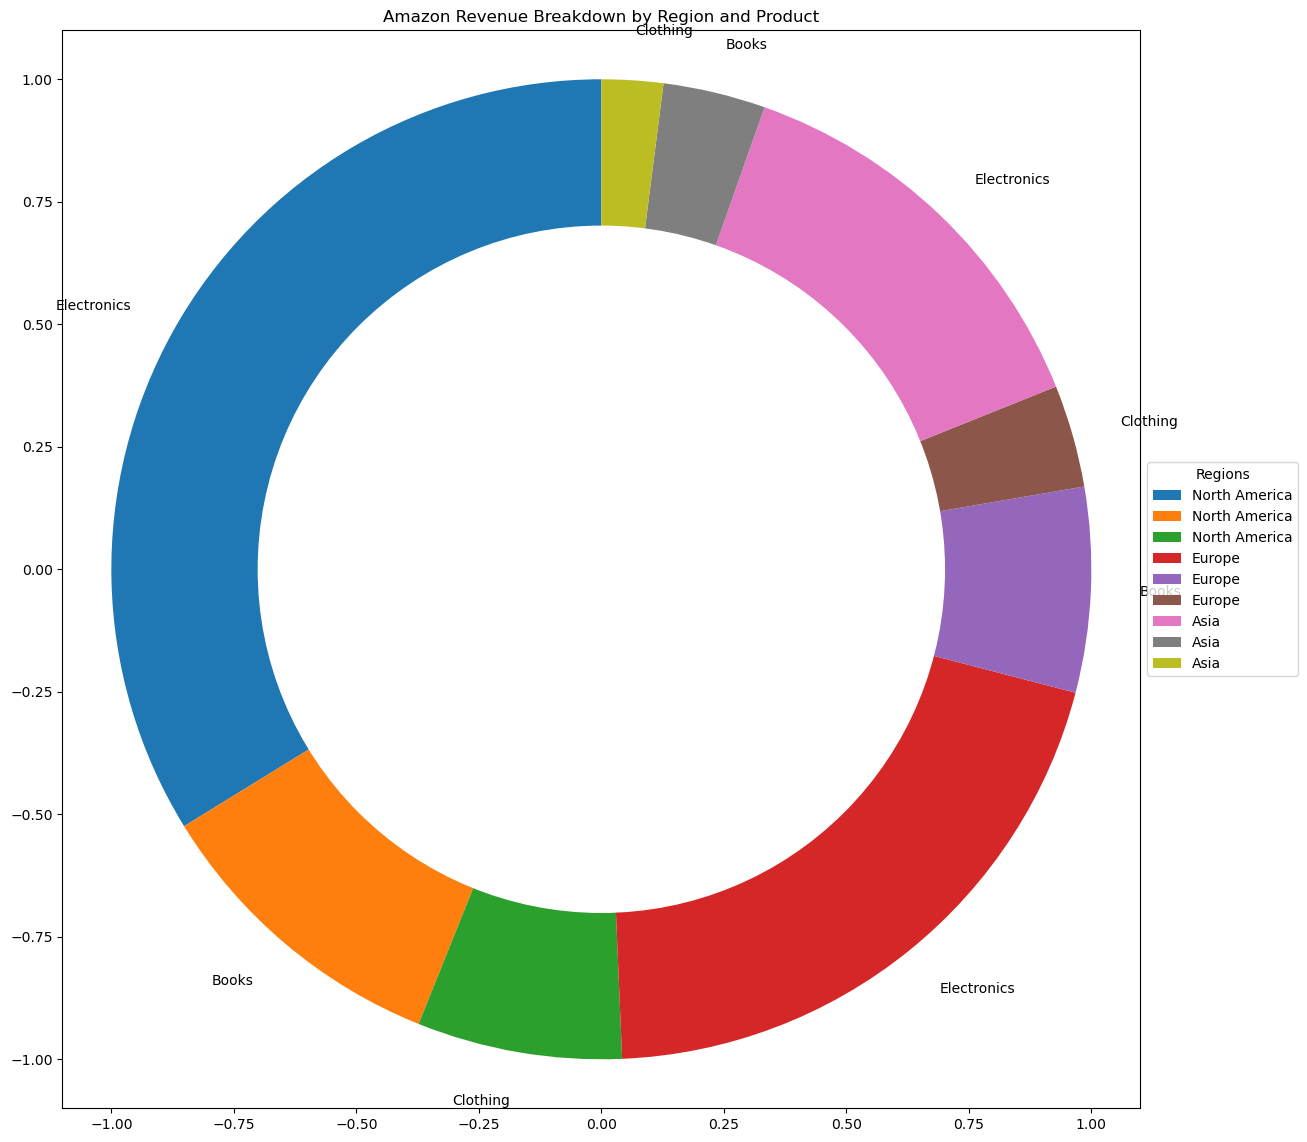

In [22]:
# Data preparation for Sunburst chart
data = {
    'region': ['North America', 'North America', 'North America', 'Europe', 'Europe', 'Europe', 'Asia', 'Asia', 'Asia'],
    'category': ['Electronics', 'Books', 'Clothing', 'Electronics', 'Books', 'Clothing', 'Electronics', 'Books', 'Clothing'],
    'revenue': [50, 15, 10, 30, 10, 5, 20, 5, 3]  # in billions USD
}

df = pd.DataFrame(data)

# Creating the sunburst chart
fig, ax = plt.subplots()
fig.set_size_inches(14, 14)
wedges, texts = plt.pie(df['revenue'], labels=df['category'], startangle=90, frame=True)

# Create a white circle to turn the pie into a donut
my_circle = plt.Circle((0, 0), 0.7, color='white')
p = plt.gcf()
p.gca().add_artist(my_circle)

ax.legend(wedges, df['region'],
          title="Regions",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.title('Amazon Revenue Breakdown by Region and Product')
plt.show()

Electronics in North America is the dominant revenue segment, it contributes $50 billion; this highlights the significance of electronic products in Amazon's largest market.


North America leads in every product category. It shows its role as Amazon's primary revenue driver. For example, it accounts for:
 - 63 % of total electronics sales.
 - 60 % of total book sales.
 - 59 % of total clothing sales.
   
   
Comparative analysis reveals Europe and Asia are more modest in contributions, with European electronics sales at $30 billion and Asian electronics sales at $20 billion. Electronics consistently generate the most revenue across all regions, indicating their global demand and market penetration. There is a clear step-down in revenue from electronics to books and then clothing within each region, indicating a prioritized market focus.

For stakeholders, given the high revenue from electronics, especially in North America, they might consider investing further in this category to maximize profitability. There may be opportunities to expand book and clothing sales in Europe and Asia, considering their lower relative sales figures compared to North America. Considering diversifying more intensely into other regions with tailored product strategies could balance the revenue streams and reduce dependency on the North American electronics market.

#### What is the market capitalization distribution of companies in the S&P 500 index?

For this visualization, we'll simulate the market capitalization for a subset of major companies in the S&P 500 index. We'll assume hypothetical values to demonstrate how a treemap can effectively represent the size and scale of different companies' market caps within the index.

Let’s simulate data for companies like Apple (AAPL), Microsoft (MSFT), Amazon (AMZN), Google (GOOGL), and Facebook (now Meta, FB), and display this using a treemap. The treemap will allow us to compare visually the proportionate size of each company's market capitalization.

Here’s the simulated market capitalization data:

    Apple (AAPL): $2 trillion
    Microsoft (MSFT): $1.8 trillion
    Amazon (AMZN): $1.6 trillion
    Google (GOOGL): $1.4 trillion
    Facebook (FB): $800 billion

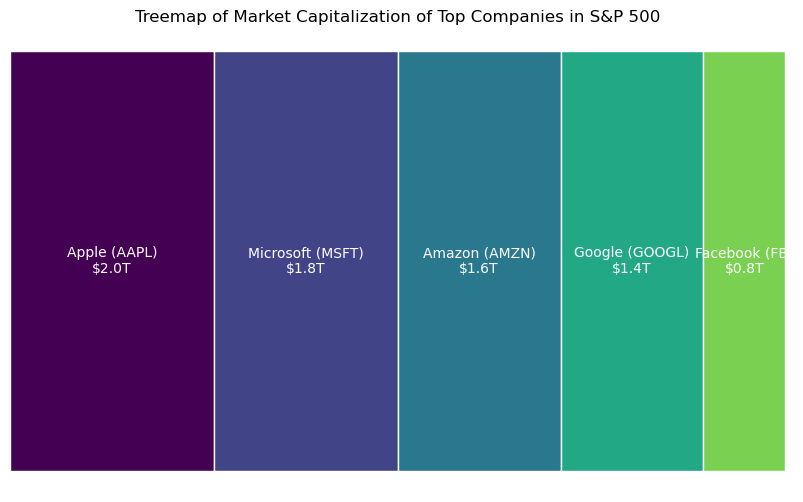

In [23]:
# Simulated market capitalization data in trillions
market_caps = {
    'Apple (AAPL)': 2.0,
    'Microsoft (MSFT)': 1.8,
    'Amazon (AMZN)': 1.6,
    'Google (GOOGL)': 1.4,
    'Facebook (FB)': 0.8
}

# Creating a DataFrame
df = pd.DataFrame(list(market_caps.items()), columns=['Company', 'Market Cap Trillions'])

# Sorting data for better visualization
df.sort_values('Market Cap Trillions', ascending=False, inplace=True)
df.reset_index(drop=True, inplace=True)

# Calculate area proportionally to market cap
total_market_cap = df['Market Cap Trillions'].sum()
df['Area'] = (df['Market Cap Trillions'] / total_market_cap) * 100  # percentage of total

# Plotting each company as a block
fig, ax = plt.subplots(figsize=(10, 6))
start = 0
for i, row in df.iterrows():
    ax.barh('Market Cap', row['Area'], left=start, color=plt.cm.viridis(i / len(df)), edgecolor='w')
    start += row['Area']
    ax.text(start - row['Area']/2, 0, f"{row['Company']}\n${row['Market Cap Trillions']}T", va='center', ha='center', color='white')

ax.set_xlim(0, 100)
ax.set_xticks([])
ax.set_yticks([])
ax.set_frame_on(False)
plt.title('Treemap of Market Capitalization of Top Companies in S&P 500')
plt.show()

Each block represents a company, with the size proportional to its market cap relative to the total market cap of these selected companies. Different colors differentiate the companies for better visual distinction. Each block includes the company's name and market capitalization in trillions of USD, positioned centrally.


The size of each block visually quantifies the company's market influence within the conglomerate of top S&P 500 companies. Companies like Apple and Microsoft occupy larger areas; this shows that their significant market cap compared to peers like Facebook.

#### What was the detailed stock performance of Microsoft (MSFT) over the last year?

For this analysis, I would like to visualize the stock performance of Microsoft (MSFT) using a stock chart, often called a candlestick chart in most MT4 trading platforms. It will be useful is seeing open, high, low, and close prices on a daily basis. 

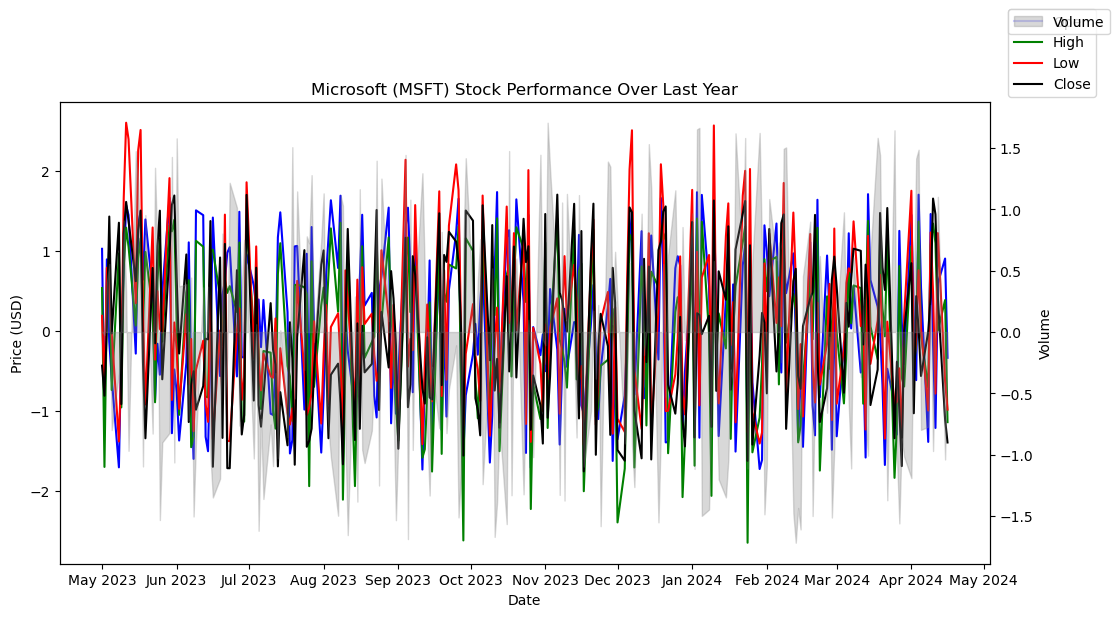

In [24]:
# Assuming data for Microsoft (MSFT) is filtered and sorted from the DataFrame
msft_data = NYC_stock_market_trends[NYC_stock_market_trends['Symbol'] == 'MSFT'].copy()
msft_data = msft_data.sort_values(by='Date')[-252:]  # Assuming ~252 trading days in a year

# Convert dates for plotting
msft_data['Date'] = pd.to_datetime(msft_data['Date'])
msft_data.set_index('Date', inplace=True)

# Create plots
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plotting price data
ax1.plot(msft_data.index, msft_data['Open'], label='Open', color='blue')
ax1.plot(msft_data.index, msft_data['High'], label='High', color='green')
ax1.plot(msft_data.index, msft_data['Low'], label='Low', color='red')
ax1.plot(msft_data.index, msft_data['Close'], label='Close', color='black')

# Plotting volume on a secondary y-axis
ax2 = ax1.twinx()
ax2.fill_between(msft_data.index, msft_data['Volume'], color='grey', alpha=0.3, label='Volume')
ax2.set_ylabel('Volume')

# Formatting the plot
ax1.xaxis.set_major_locator(mdates.MonthLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
ax1.set_xlabel('Date')
ax1.set_ylabel('Price (USD)')
ax1.set_title('Microsoft (MSFT) Stock Performance Over Last Year')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Move the legend outside the plot to the right
ax1.legend(loc='upper left', bbox_to_anchor=(1.02, 1.2), borderaxespad=0.)
ax2.legend(loc='upper left', bbox_to_anchor=(1.02, 1.2), borderaxespad=0.)

plt.show()

Identifying peak prices, volume peaks correlated with significant price changes, and discerning trends, such as steady increases or decreases over specific periods.


For stakeholders, understanding when and why the stock reached its peak or dipped can provide insights into market conditions and Microsoft's business performance. The data can help in making informed decisions about buying or selling shares based on historical performance and trends. Observing the volume alongside price changes helps assess market sentiment and potential risk, as high volume days with significant price drops might indicate market unease.

# The end...!